## Mapa das unidades de conservação da Paraíba(PB)

#### Importando as bases

In [62]:
import pandas as pd
import geopandas as gpd
import geobr
import rtree
import matplotlib.pyplot as plt

#### Pegando os dados

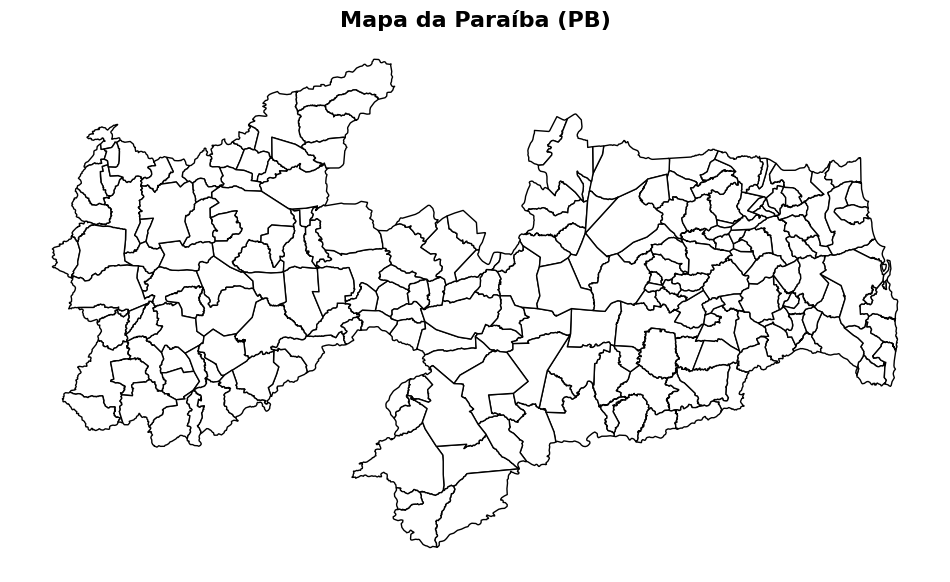

In [77]:
estado = geobr.read_municipality(code_muni='PB', year=2020)

fig,ax=plt.subplots(figsize=(12,8))
estado.plot(ax=ax, color='White', edgecolor='black')
ax.set_title('Mapa da Paraíba (PB)', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

#### Definição do Sistema de Coordenadas:


In [22]:
estado.crs="EPSG:4326"
estado.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Unidades de conservação de todo Brasil

In [67]:
unidades_conservacao = geobr.read_conservation_units()
unidades_conservacao.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [68]:
#Sistema de referencia de coordenadas
unidades_conservacao.crs = "EPSG:4326"
unidades_conservacao.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Juntando os Dados Espacialmente

In [71]:
unidades_conservacao_pb = gpd.sjoin(uc_gdf, estado)

#### Filtrando Municípios com Unidades de Conservação

In [74]:
municipios_com_unidades = estado[estado['code_muni'].isin(unidades_conservacao_pb['code_muni'].unique())]
lista_municipios = pd.DataFrame(municipios_com_unidades[['name_muni', 'code_muni']])
print("Municípios da Paraíba que possuem Unidades de Conservação:")
display(lista_municipios)

Municípios da Paraíba que possuem Unidades de Conservação:


,name_muni,code_muni
7,Alhandra,2500601.0
14,Areia,2501104.0
19,Baía Da Traição,2501401.0
20,Bananeiras,2501500.0
26,Belém,2501906.0
30,Boa Vista,2502151.0
36,Borborema,2502706.0
39,Caaporã,2503001.0
40,Cabaceiras,2503100.0
41,Cabedelo,2503209.0


#### Visualização

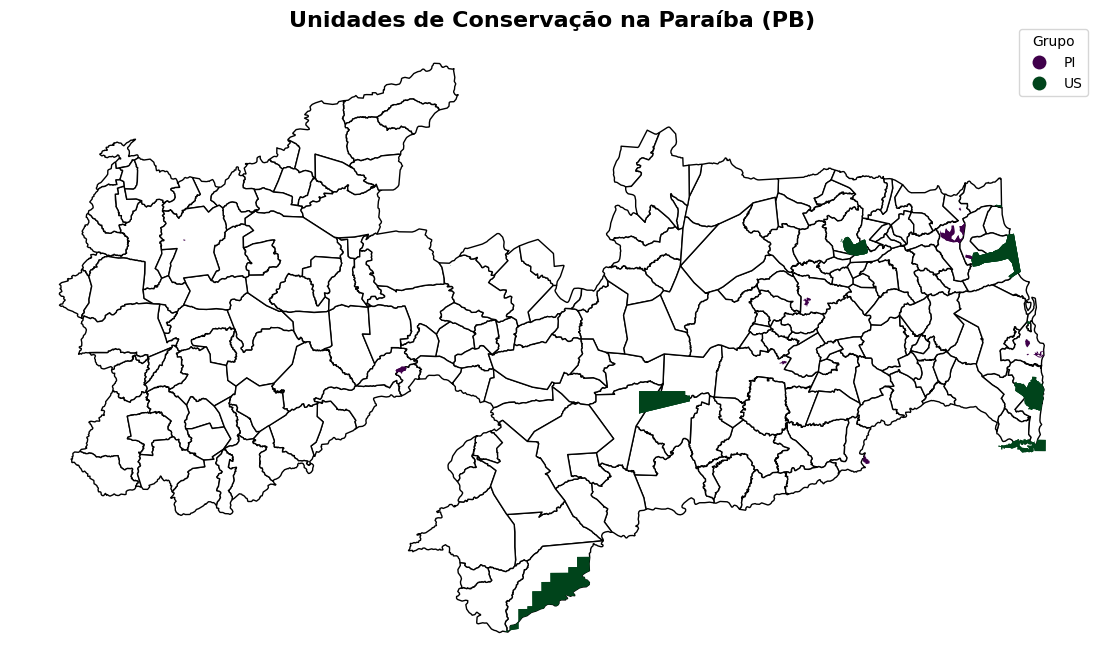

In [75]:
fig, ax = plt.subplots(figsize=(14, 10))
estado.plot(ax=ax, color='white', edgecolor='black')
unidades_conservacao_pb.plot(ax=ax, column='group', legend=True, cmap='PRGn')
ax.set_title('Unidades de Conservação na Paraíba (PB)', fontsize=16, fontweight='bold')
ax.set_axis_off()

leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 1.02)) 
leg.set_title("Grupo")

plt.show()
